## Artificial Intelligence Assignment 1
presented by - Ashutosh Chauhan  
### Problem 1
The Following submission utilises the given city distance data in a *.csv* file.  
I used [LocationIQ](https://www.locationiq.com) to get `Latitude` & `Longitude` details of locations.  
I used distance calculation formula provided at [GeoData Source](https://www.geodatasource.com/developers/javascript).  

In [1]:
import csv
import requests
import json
import time
from math import radians, sin, cos, acos, atan2, sqrt, pi as PI
from graphviz import Digraph

In [70]:
def get_graph(graph:dict, all_cities:set, path=[]):
    dot = Digraph(comment='City Graph', strict=True, graph_attr={'size': '10,10!'}, node_attr={'color': '#AAAAAA'})
    
    edges = set()
    for i in all_cities:
        if i in path:
            dot.node(i,i,color='#006992', style="filled", fontcolor="white")
    dot.node(path[0],path[0],color='#006992', style="filled", fontcolor="white", shape="doublecircle")
    if path:
        for i in range(len(path)-1):
            s,d = path[i:i+2]
            dot.edge(s,d, label=str(graph[s][d]), color='green')
            edges.add((s,d))
    for x in graph.keys():
        for y in graph[x].keys():
            if (x,y) not in edges and (y,x) not in edges and x != y:
                edges.add((x,y)) 
                dot.edge(x,y, label=str(graph[x][y]), dir='none', color='#DDDDDD')
    return dot

#### Mentioning keys required for LocationIQ API

In [71]:
LOC_IQ_API_KEY='2e9d2aa2d46004'
LOC_IQ_URL = "https://us1.locationiq.com/v1/search.php"

#### Get latitude and longitude details from LocationIQ API

In [72]:
def get_lat_long(location):
    data = {
        'key': LOC_IQ_API_KEY,
        'q': location,
        'format': 'json'
    }
    response = requests.get(LOC_IQ_URL, params=data)
    data = json.loads(response.text)
    if data:
        try:
            return list(map(float,(data[0]['lat'], data[0]['lon'])))
        except:
            print(data)
    return None

#### Direct Distance formula for latitude and longitude

In [52]:
def direct_distance(s, d):
    if s is None or d is None:
        return None
    if s == d:
        return 0
    lat1,lon1 = s
    lat2,lon2 = d
    radlat1 = PI * lat1/180
    radlat2 = PI * lat2/180
    theta = lon1 - lon2
    radtheta = PI * theta/180
    dist = sin(radlat1) * sin(radlat2) + cos(radlat1) * cos(radlat2) * cos(radtheta)
    if dist > 1:
        dist = 1
    dist = acos(dist)
    dist = dist * 180/PI
    dist = dist * 60 * 1.1515 * 1.609344
    return round(dist,2)

#### Load data from *.csv file*
We load the data in a 2d dictionary

In [53]:
f = open('indian_capitals.csv')
data = csv.reader(f)

In [54]:
all_cities = set()
city_dist = dict()
for i in data:
    # Read Line from file
    s_city, d_city, dist = i
    
    # Add entry for city if not already exists
    if s_city not in city_dist:
        city_dist[s_city] = dict()
        all_cities.add(s_city)
    if d_city not in city_dist:
        city_dist[d_city] = dict()
        all_cities.add(d_city)

    # Add the city distances in the dictionary
    city_dist[s_city][d_city] = int(dist)
    city_dist[d_city][s_city] = int(dist)    
    
# Close the file
f.close()

#### Retrieve Location details of all provided cities
We did this to pervent redundant calls to API 

In [55]:
# all_city_coordinates = dict()
# tmp = set(all_cities)
# while len(tmp) > 0:
#     try:
#         i = tmp.pop()
#         all_city_coordinates[i] = get_lat_long(i)
#     except:
#         tmp.add(i)
#         time.sleep(10)

#### Cached data of previous command
Since the latitude and longitudes of cities are not gonna change every minute 😎.

In [56]:
# The cached data from previous command
all_city_coordinates = {'Thiruvanathapuram': [8.54145, 76.9704251],
 'Ranchi': [23.3700354, 85.3250132],
 'Chennai': [13.0801721, 80.2838331],
 'Panaji': [15.4989946, 73.8282141],
 'Shimla': [31.1041526, 77.1709729],
 'Lucknow': [26.8381, 80.9346001],
 'Bhopal': [23.2530923, 77.3962718],
 'Srinagar': [34.0747444, 74.8204443],
 'Dispur': [26.1513079, 91.793380495259],
 'Shillong': [25.5760446, 91.8825282],
 'Agartala': [23.8312377, 91.2823821],
 'Itanagar': [27.0979659, 93.6237291],
 'Kohima': [25.75, 94.166667],
 'Raipur': [21.2379469, 81.6336833],
 'Aizawl': [23.7414092, 92.7209297],
 'Bhubaneswar': [20.2667774, 85.8435592],
 'Hyderabad': [25.3801017, 68.3750376],
 'Chandigarh': [30.7194022, 76.7646552],
 'Mumbai': [18.9387711, 72.8353355],
 'Gandhinagar': [23.2232877, 72.6492267],
 'Patna': [25.6093239, 85.1235252],
 'Imphal': [24.8006088, 93.9369998],
 'Dehradun': [30.3255646, 78.0436813],
 'Gangtok': [27.329046, 88.6122673],
 'Jaipur': [26.916194, 75.820349],
 'Bangalore': [12.9791198, 77.5912997],
 'Kolkata': [22.5677459, 88.3476023],
 'Amaravathi': [10.7848857, 77.5897043]}

#### Calculate distance between each pair of city

In [57]:
city_dist_eucl = dict()
for i in all_cities:
    city_dist_eucl[i] = dict()
    for j in all_cities:
        a,b = all_city_coordinates[i], all_city_coordinates[j]
        city_dist_eucl[i][j] = direct_distance(a,b)

#### Fuction to verify equality of two values

In [58]:
def EQUAL(node, dest):
    return node == dest

#### Function to verify if two sets intersects

In [59]:
def INTERSECTING_SETS(set1, set2):
    return len(set1.intersection(set2)) > 0

#### Code for Breadth First Search

In [60]:
def SEARCH_BFS(source, destination, goal_test):
    frontier = [source]
    visited = set()
    parent = dict()
    parent[source] = source
    
    # While there are nodes to be explored
    while frontier:
        # Pop the first element
        current = frontier.pop(0)
        
        # If element is already visited then skip
        if current in visited:
            continue
        
        # Add current node to visited nodes
        visited.add(current)
        
        # Check if goal state condition is reached
        if goal_test(current, destination):
            break

        # Add all the child/neigbour to frontier
        if current in city_dist:
            for i in city_dist[current].keys():
                # Do not add visited node again
                if i not in visited:
                    frontier.append(i)
                    parent[i] = current

    path = []

    # Find path to reach the goal state
    if destination in visited:
        s = destination
        while s not in path:
            path.append(s)
            s = parent[s]
        return path[::-1]
    else:
        print("Not Found!")
        return []

#### Code for Depth First Search

In [61]:
def SEARCH_DFS(source, destination, goal_test):
    frontier = [source]
    visited = set()
    parent = dict()
    parent[source] = source

    # While there are nodes to be explored
    while frontier:
        # Pop the first element
        x = frontier.pop(-1)
                
        # If element is already visited then skip
        if x in visited:
            continue
            
        # Check if goal state condition is reached
        visited.add(x)

        # Add all the child/neigbour to frontier
        if goal_test(x, destination):
            break

        # Do not add visited node again
        if x in city_dist:
            for i in city_dist[x].keys():
                if i not in visited:
                    frontier.append(i)
                    parent[i] = x
        
    path = []

    # Find path to reach the goal state
    if destination in visited:
        s = destination
        while s not in path:
            path.append(s)
            s = parent[s]
        return path[::-1]
    else:
        print("Not Found!")
        return []

#### Code for Bi-Direction Breadth First Search

In [62]:
def SEARCH_BI_DIR_BFS(source, destination, goal_test):
    frontier1 = [source]
    frontier2 = [destination]
    visited1 = set()
    visited2 = set()
    parent1 = dict([(source, source)])
    parent2 = dict([(destination, destination)])

    
    # While there are nodes to be explored
    while frontier1 and frontier2:
        if frontier1:
            # Pop the first element
            s_node = frontier1.pop(0)

            # If element is already visited then skip
            if s_node in visited1:
                continue

            # Add current node to visited nodes
            visited1.add(s_node)

            # Check if goal state condition is reached
            if goal_test(visited1, visited2):
                break

            # Add all the child/neigbour to frontier
            if s_node in city_dist:
                for i in city_dist[s_node].keys():
                    # Do not add visited node again
                    if i not in visited1:
                        frontier1.append(i)
                        parent1[i] = s_node

        if frontier2:
            # Pop the first element
            d_node = frontier2.pop(0)

            # If element is already visited then skip
            if d_node in visited2:
                continue

            # Add current node to visited nodes
            visited2.add(d_node)

            # Check if goal state condition is reached
            if goal_test(visited1, visited2):
                break

            # Add all the child/neigbour to frontier
            if d_node in city_dist:
                for j in city_dist[d_node].keys():
                    # Do not add visited node again
                    if j not in visited2:
                        frontier2.append(j)
                        parent2[j] = d_node

    path1 = []
    path2 = []
    
    # Find path to reach the goal state
    if visited1.intersection(visited2):
        mid = visited1.intersection(visited2).pop()
        s = mid
        while destination not in path1:
            path1.append(s)
            s = parent2[s]
        s = mid
        while source not in path2:
            path2.append(s)
            s = parent1[s]
        return path2[::-1] + path1[1:]
    else:
        print("Not Found!")
        return []

#### Code for A ⭐ Search

In [63]:
def SEARCH_A_STAR(source, destination, goal_test, heuristic=lambda x,y: city_dist_eucl[x][y]):
    frontier = [(source, 0)]
    visited = set()
    parent = dict()
    parent[source] = source
    
    # While there are nodes to be explored
    while frontier:
        # Sort Frotier according to 
        frontier.sort(key=lambda x: x[1] + heuristic(x[0], destination))

        # Pop the first element
        x,c = frontier.pop(0)
                
        # If element is already visited then skip
        if x in visited:
            continue
            
        # Check if goal state condition is reached
        visited.add(x)

        # Add all the child/neigbour to frontier
        if goal_test(x, destination):
            break

        # Do not add visited node again
        if x in city_dist:
            for i in city_dist[x].keys():
                if i not in visited:
                    frontier.append((i, c + city_dist[x][i]))
                    parent[i] = x
        
    path = []

    # Find path to reach the goal state
    if destination in visited:
        s = destination
        while s not in path:
            path.append(s)
            s = parent[s]
        return path[::-1]
    else:
        print("Not Found!")
        return []

In [64]:
SEARCH_BFS('Bangalore', 'Patna', EQUAL)

['Bangalore',
 'Amaravathi',
 'Bhubaneswar',
 'Raipur',
 'Ranchi',
 'Lucknow',
 'Patna']

In [65]:
SEARCH_DFS('Bangalore', 'Patna', EQUAL)

['Bangalore', 'Hyderabad', 'Mumbai', 'Raipur', 'Ranchi', 'Patna']

In [66]:
SEARCH_BI_DIR_BFS('Bangalore', 'Patna', INTERSECTING_SETS)

['Bangalore', 'Amaravathi', 'Bhubaneswar', 'Ranchi', 'Lucknow', 'Patna']

In [67]:
SEARCH_A_STAR('Bangalore', 'Patna', EQUAL)

['Bangalore', 'Hyderabad', 'Raipur', 'Ranchi', 'Patna']

In [75]:
def SEARCH():
    ALGO = {
        'BFS': SEARCH_BFS,
        'DFS': SEARCH_DFS,
        'BDBFS': SEARCH_BI_DIR_BFS,
        'ASTAR': SEARCH_A_STAR,
    }
    source = input("Enter Source:")
    destination = input("Enter Destination:")
    algo = input("Enter Algo:")
    if algo in ALGO:
        path = ALGO[algo](source, destination, (EQUAL if (algo != 'BDBFS') else INTERSECTING_SETS))
        return get_graph(city_dist, all_cities, path)

Enter Source: Bangalore
Enter Destination: Patna
Enter Algo: BFS


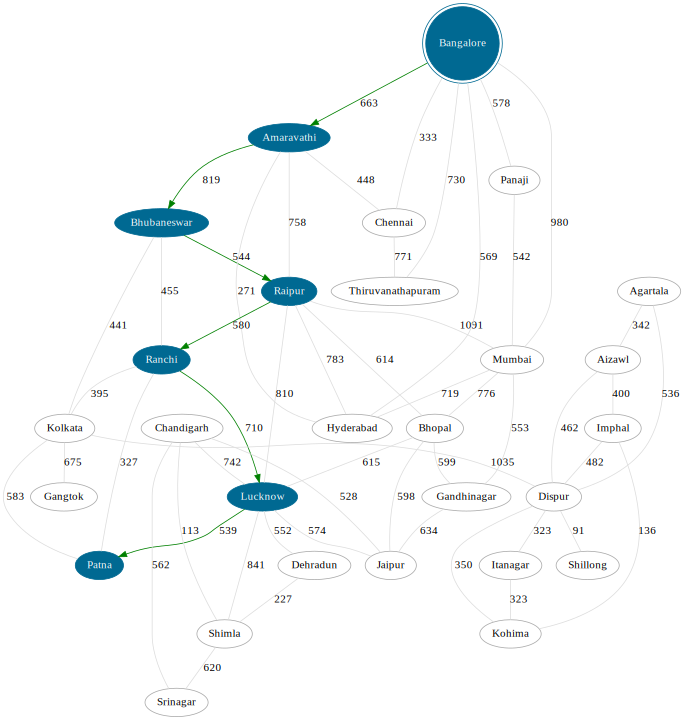

In [76]:
SEARCH()